### Множественная линейная регрессия [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```rmse(y_true, y_pred)```, которая будет вычислять сумму отклонений:

$$Error = \sqrt { \frac {1}{n} \sum_{i}^n (y_i^{true}-y_i^{pred})^2}$$

In [1]:
import numpy as np

def rmse(y_true, y_pred):
    #Начало вашего кода
    return np.mean((y_true - y_pred) ** 2) ** 0.5
    #Конец вашего кода

np.random.seed(1)
y_true = np.random.randint(0,10,(10,))
y_pred = np.random.randint(0,10,(10,))
print(y_true)
print(y_pred)
print(rmse(y_true, y_pred))

[5 8 9 5 0 0 1 7 6 9]
[2 4 5 2 4 2 4 7 7 9]
2.8284271247461903


### Ожидаемые результаты:

```
[5 8 9 5 0 0 1 7 6 9]
[2 4 5 2 4 2 4 7 7 9]
2.8284271247461903
```

2. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [4]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    return pd.read_csv(filename)
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1334,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1335,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1336,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


3. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [5]:
def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indices = np.arange(0, data.index.size)
    
    np.random.shuffle(indices)
    
    val_indices = indices[:round(ratio * data.index.size)]
    train_indices = indices[round(ratio * data.index.size):]
    
    val_data = data.iloc[val_indices]
    train_data = data.iloc[train_indices]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [6]:
splitted_data["validation"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,610,20,7943,4,5,1961,1961,192.0,903,0,...,64,0,39,0,0,0,0,4,2007,118500
1087,1189,60,8935,7,5,2002,2002,95.0,0,0,...,144,68,0,0,0,0,0,7,2009,195000
1020,1116,20,12085,8,5,2007,2007,328.0,1004,0,...,0,0,0,0,0,0,0,11,2007,318000
460,502,60,9803,7,5,2005,2005,0.0,400,0,...,0,108,0,0,0,0,0,2,2008,226700
802,873,20,8892,5,7,1953,1996,0.0,0,0,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

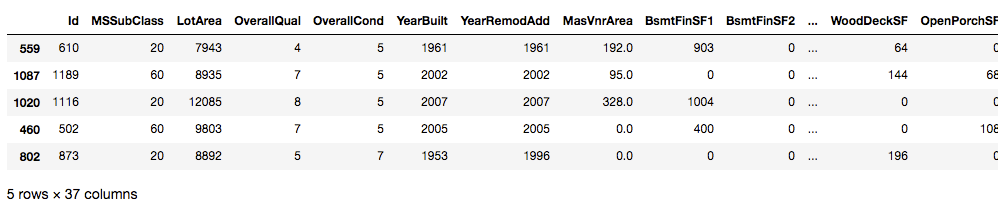

In [7]:
splitted_data["train"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,390,60,12474,10,5,2007,2008,272.0,1280,0,...,196,134,0,0,0,0,0,8,2008,426000
1316,1436,20,8400,6,9,1962,2005,237.0,0,0,...,0,36,0,0,0,0,0,7,2008,174000
133,147,30,6120,5,7,1931,1993,0.0,209,0,...,48,0,0,0,0,0,0,11,2009,105000
181,202,20,10125,6,6,1977,1977,0.0,641,279,...,238,83,0,0,0,0,0,2,2008,171500
1133,1240,20,9037,8,5,2006,2006,32.0,428,0,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

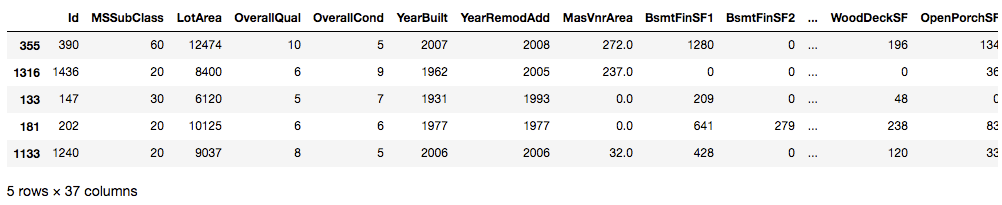

4. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
fig = plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

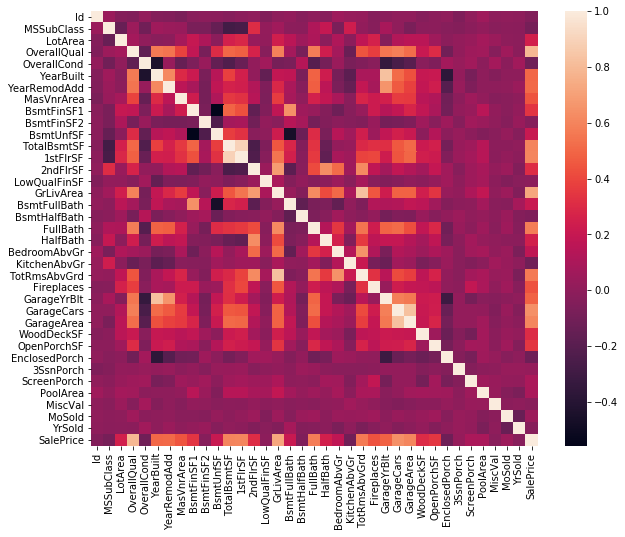

5. Теперь выберите топ 5 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь распечатайте таблицу, содержащую коэффициенты корреляции этих параметров (переменных)

In [9]:
#Начало вашего кода 
corr = splitted_data["train"].corr()
important = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[1:6].index.tolist()
sale_price = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[:6].index.tolist()
#Конец вашего кода
splitted_data["train"][sale_price].corr()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF
SalePrice,1.000000,0.790700,0.720251,0.644677,0.610443,0.606605
OverallQual,0.790700,1.000000,0.589688,0.584686,0.523754,0.482587
GrLivArea,0.720251,0.589688,1.000000,0.488214,0.483841,0.545485
GarageCars,0.644677,0.584686,0.488214,1.000000,0.828212,0.444036
GarageArea,0.610443,0.523754,0.483841,0.828212,1.000000,0.499783
1stFlrSF,0.606605,0.482587,0.545485,0.444036,0.499783,1.000000


### Ожидаемые результаты:


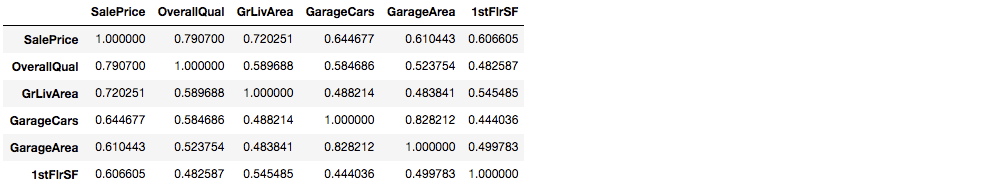

6. Теперь пришло время использовать модель **множественной** линейной регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_multiple_lin_regressors(data, parameters, target="SalePrice")```, которая будет обучать модель линейной регрессии для ```n``` параметров из списка ```parameters```. Функция должна возвращать обученную модель **множественной** линейной регрессии.

In [10]:
from sklearn.linear_model import LinearRegression 
#Начало вашего кода 
def train_multiple_lin_regressors(data, important, target="SalePrice"):
    return LinearRegression().fit(data[important].values,data[target].values)
#Конец вашего кода

multiple_regressor = train_multiple_lin_regressors(splitted_data["train"], important, target="SalePrice")

7. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(regressors, data, target="SalePrice")```, которая будет принимать обученную модель множественной линейной регрессии ```regressor```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбцец предсказан моделью множественной линейной регрессии.

In [11]:
#Начало вашего кода
def validation(regressor, data, important, target="SalePrice"):
    names = "-".join(important)
    data[names] = regressor.predict(data[important].values)
    data[names] = data[names].apply(lambda x: int(x))
    return data[[target, names]]
#Конец вашего кода

pd_predictions = validation(multiple_regressor, splitted_data["validation"], important, target="SalePrice")
pd_predictions

<ipython-input-11-e6a74959084b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[names] = regressor.predict(data[important].values)
<ipython-input-11-e6a74959084b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[names] = data[names].apply(lambda x: int(x))


,SalePrice,OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF
559,118500,83211
1087,195000,204257
1020,318000,287194
460,226700,212371
802,116000,120477
...,...,...
120,150750,155779
759,189000,213658
248,139000,181441
991,187500,165121


### Ожидаемые результаты:

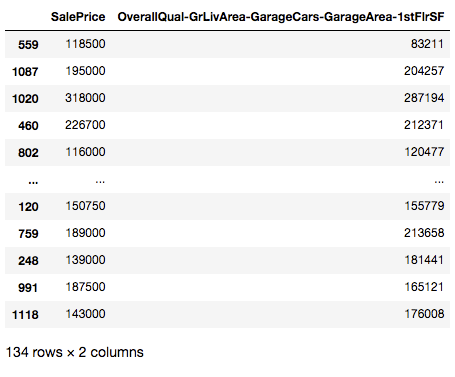

8. Используя функции ```rmse```, просчитайте ошибку предсказании модели множественной линейной регрессии. Кроме того, нанесите график, как показано ниже, с осью Y, которая представляет прогнозируемую ```"SalePrice"```, и осью X, представляющей истинную ```"SalePrice"```. Примечание: ```figsize=(10,7)```, ```style="darkgrid"```, ```context="talk"```.

In [13]:
#Начало вашего кода 
fig = plt.figure(figsize=(10,7))
sns.regplot(x="SalePrice", y="OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF", data=pd_predictions);
sns_rmse = rmse(pd_predictions["SalePrice"], pd_predictions["OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF"])
plt.title(f"Truth vs Prediction with RMSE {sns_rmse:.2f}")
plt.ylim(30000, 755000);
plt.xlim(70000, 755000);
sns.set(style="darkgrid")
sns.set_context("talk")
#Конец вашего кода

### Ожидаемые результаты:

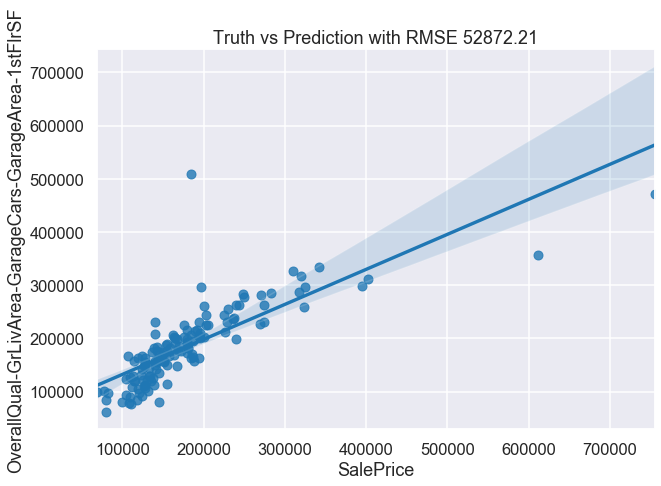

9. Теперь используйте топ-5 наиболее коррелированных столбцов ```important``` с ```"SalePrice"``` и постройте и обучите все возможные модели множественной линейной регрессии, используя два столбца.

In [14]:
regressors = {}
#Начало вашего кода 
for x in important:
    for y in important:
        if x != y:
            regressors[x + "-" + y] = LinearRegression().fit(splitted_data["train"][[x,y]].values, splitted_data["train"]["SalePrice"].values)
#Конец вашего кода
print(regressors)

{'OverallQual-GrLivArea': LinearRegression(), 'OverallQual-GarageCars': LinearRegression(), 'OverallQual-GarageArea': LinearRegression(), 'OverallQual-1stFlrSF': LinearRegression(), 'GrLivArea-OverallQual': LinearRegression(), 'GrLivArea-GarageCars': LinearRegression(), 'GrLivArea-GarageArea': LinearRegression(), 'GrLivArea-1stFlrSF': LinearRegression(), 'GarageCars-OverallQual': LinearRegression(), 'GarageCars-GrLivArea': LinearRegression(), 'GarageCars-GarageArea': LinearRegression(), 'GarageCars-1stFlrSF': LinearRegression(), 'GarageArea-OverallQual': LinearRegression(), 'GarageArea-GrLivArea': LinearRegression(), 'GarageArea-GarageCars': LinearRegression(), 'GarageArea-1stFlrSF': LinearRegression(), '1stFlrSF-OverallQual': LinearRegression(), '1stFlrSF-GrLivArea': LinearRegression(), '1stFlrSF-GarageCars': LinearRegression(), '1stFlrSF-GarageArea': LinearRegression()}


### Ожидаемые результаты:

```
{'OverallQual-GrLivArea': LinearRegression(), 'OverallQual-GarageCars': LinearRegression(), 'OverallQual-GarageArea': LinearRegression(), 'OverallQual-1stFlrSF': LinearRegression(), 'GrLivArea-OverallQual': LinearRegression(), 'GrLivArea-GarageCars': LinearRegression(), 'GrLivArea-GarageArea': LinearRegression(), 'GrLivArea-1stFlrSF': LinearRegression(), 'GarageCars-OverallQual': LinearRegression(), 'GarageCars-GrLivArea': LinearRegression(), 'GarageCars-GarageArea': LinearRegression(), 'GarageCars-1stFlrSF': LinearRegression(), 'GarageArea-OverallQual': LinearRegression(), 'GarageArea-GrLivArea': LinearRegression(), 'GarageArea-GarageCars': LinearRegression(), 'GarageArea-1stFlrSF': LinearRegression(), '1stFlrSF-OverallQual': LinearRegression(), '1stFlrSF-GrLivArea': LinearRegression(), '1stFlrSF-GarageCars': LinearRegression(), '1stFlrSF-GarageArea': LinearRegression()}
```

10. Теперь оцените все обученные двухпараметрические модели линейной регрессии ```regressors```  с использованием набора данных ```validation``` и верните ```DataFrame``` в формате, указанном ниже.

In [15]:
#Начало вашего кода 
data_cp = splitted_data["validation"].copy()
for key, pred in regressors.items():
    cut = key.split("-")    
    data_cp[key] = pred.predict(data_cp[cut].values)
    data_cp[key] = data_cp[key].apply(lambda x: int(x))
name_pred = ["SalePrice"] +  list(regressors.keys()) 
models_predictions = data_cp[name_pred]
#Конец вашего кода
models_predictions

,SalePrice,OverallQual-GrLivArea,OverallQual-GarageCars,OverallQual-GarageArea,OverallQual-1stFlrSF,GrLivArea-OverallQual,GrLivArea-GarageCars,GrLivArea-GarageArea,GrLivArea-1stFlrSF,GarageCars-OverallQual,...,GarageCars-GarageArea,GarageCars-1stFlrSF,GarageArea-OverallQual,GarageArea-GrLivArea,GarageArea-GarageCars,GarageArea-1stFlrSF,1stFlrSF-OverallQual,1stFlrSF-GrLivArea,1stFlrSF-GarageCars,1stFlrSF-GarageArea
559,118500,83995,75443,75328,93608,83995,105443,110628,135791,75443,...,115776,125590,75328,110628,115776,134493,93608,135791,125590,134493
1087,195000,220251,220323,215747,196385,220251,203484,196416,176589,220323,...,193332,166825,215747,196416,193332,157552,196385,176589,166825,157552
1020,318000,257623,291240,302462,288278,257623,256575,264007,238512,291240,...,291287,297137,302462,264007,291287,304627,288278,238512,297137,304627
460,226700,226625,220323,228021,198467,226625,212199,221016,187822,220323,...,204386,169657,228021,221016,204386,178988,198467,187822,169657,178988
802,116000,109977,146360,130577,124715,109977,142960,122207,118452,146360,...,185393,173216,130577,122207,185393,150644,124715,118452,173216,150644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,150750,134588,146360,154009,149517,134588,176611,186897,179210,146360,...,206496,206954,154009,186897,206496,220103,149517,179210,206954,220103
759,189000,206913,220323,219540,232250,206913,185246,182210,194801,220323,...,196748,215611,219540,182210,196748,212435,232250,194801,215611,212435
248,139000,185594,149406,160274,205842,185594,154105,172195,223650,149406,...,123514,174376,160274,172195,123514,196640,205842,223650,174376,196640
991,187500,177685,183341,168197,149874,177685,190410,170944,154342,183341,...,184891,155498,168197,170944,184891,131953,149874,154342,155498,131953


In [20]:
models_predictions.describe()

,SalePrice,OverallQual-GrLivArea,OverallQual-GarageCars,OverallQual-GarageArea,OverallQual-1stFlrSF,GrLivArea-OverallQual,GrLivArea-GarageCars,GrLivArea-GarageArea,GrLivArea-1stFlrSF,GarageCars-OverallQual,...,GarageCars-GarageArea,GarageCars-1stFlrSF,GarageArea-OverallQual,GarageArea-GrLivArea,GarageArea-GarageCars,GarageArea-1stFlrSF,1stFlrSF-OverallQual,1stFlrSF-GrLivArea,1stFlrSF-GarageCars,1stFlrSF-GarageArea
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,180066.320896,185182.417910,183497.335821,181461.164179,183684.798507,185182.417910,187918.425373,185596.052239,188452.141791,183497.335821,...,184527.089552,186395.141791,181461.164179,185596.052239,184527.089552,183568.641791,183684.798507,188452.141791,186395.141791,183568.641791
std,88282.906428,71390.835224,65609.270454,64205.896242,66604.607531,71390.835224,66005.999290,63293.476934,67953.682828,65609.270454,...,49561.907323,58230.913798,64205.896242,63293.476934,49561.907323,54106.486287,66604.607531,67953.682828,58230.913798,54106.486287
min,68400.000000,67352.000000,75443.000000,70753.000000,73921.000000,67352.000000,82686.000000,81132.000000,94702.000000,75443.000000,...,106029.000000,90558.000000,70753.000000,81132.000000,106029.000000,87044.000000,73921.000000,94702.000000,90558.000000,87044.000000
25%,128475.000000,134234.000000,146360.000000,134370.750000,134201.500000,134234.000000,145084.000000,148599.000000,139725.000000,146360.000000,...,127432.500000,150441.000000,134370.750000,148599.000000,127432.500000,146034.000000,134201.500000,139725.000000,150441.000000,146034.000000
50%,158450.000000,183026.500000,183341.000000,174054.500000,173367.000000,183026.500000,177704.500000,175790.000000,179939.000000,183341.000000,...,190819.500000,178920.500000,174054.500000,175790.000000,190819.500000,176437.500000,173367.000000,179939.000000,178920.500000,176437.500000
75%,195750.000000,219985.500000,220323.000000,219400.750000,223596.000000,219985.500000,217908.500000,212134.250000,221479.500000,220323.000000,...,201496.500000,215246.750000,219400.750000,212134.250000,201496.500000,210683.750000,223596.000000,221479.500000,215246.750000,210683.750000
max,755000.000000,497269.000000,365203.000000,373907.000000,448153.000000,497269.000000,493989.000000,505182.000000,572293.000000,365203.000000,...,291287.000000,410727.000000,373907.000000,505182.000000,291287.000000,411606.000000,448153.000000,572293.000000,410727.000000,411606.000000


Ожидаемые результаты:

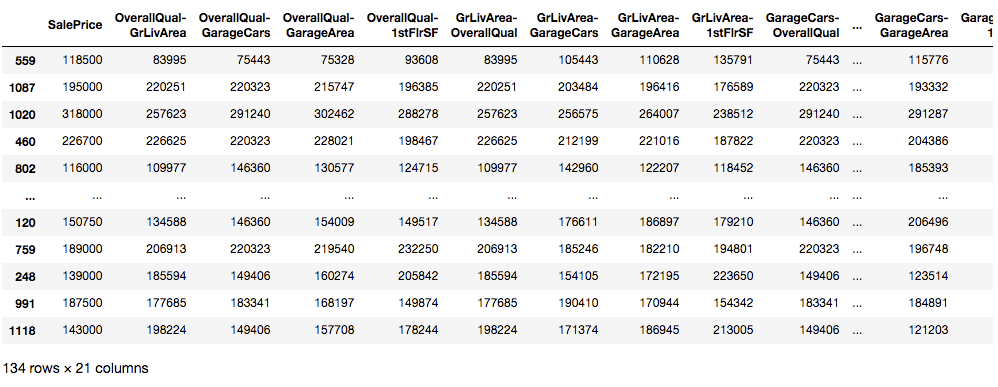

11. Теперь вычислите значение rmse для каждого столбца ```models_predictions```.

In [16]:
rmse_errors = {}
#Начало вашего кода 
for val in models_predictions.columns.tolist():
    if val != "SalePrice":
        rmse_errors[val] = rmse(models_predictions["SalePrice"], models_predictions[val])

for k, v in rmse_errors.items():
    print(f"{k} : {v:.2f}")
    
#Конец вашего кода

OverallQual-GrLivArea : 56461.25
OverallQual-GarageCars : 58221.88
OverallQual-GarageArea : 57561.33
OverallQual-1stFlrSF : 55089.53
GrLivArea-OverallQual : 56461.25
GrLivArea-GarageCars : 59569.17
GrLivArea-GarageArea : 60237.54
GrLivArea-1stFlrSF : 64048.10
GarageCars-OverallQual : 58221.88
GarageCars-GrLivArea : 59569.17
GarageCars-GarageArea : 69265.66
GarageCars-1stFlrSF : 61879.34
GarageArea-OverallQual : 57561.33
GarageArea-GrLivArea : 60237.54
GarageArea-GarageCars : 69265.66
GarageArea-1stFlrSF : 64761.04
1stFlrSF-OverallQual : 55089.53
1stFlrSF-GrLivArea : 64048.10
1stFlrSF-GarageCars : 61879.34
1stFlrSF-GarageArea : 64761.04


Ожидаемые результаты:

```
OverallQual-GrLivArea  : 56461.25
OverallQual-GarageCars : 58221.88
OverallQual-GarageArea : 57561.33
OverallQual-1stFlrSF   : 55089.53
GrLivArea-OverallQual  : 56461.25
GrLivArea-GarageCars   : 59569.17
GrLivArea-GarageArea   : 60237.54
GrLivArea-1stFlrSF     : 64048.10
GarageCars-OverallQual : 58221.88
GarageCars-GrLivArea   : 59569.17
GarageCars-GarageArea  : 69265.66
GarageCars-1stFlrSF    : 61879.34
GarageArea-OverallQual : 57561.33
GarageArea-GrLivArea   : 60237.54
GarageArea-GarageCars  : 69265.66
GarageArea-1stFlrSF    : 64761.04
1stFlrSF-OverallQual   : 55089.53
1stFlrSF-GrLivArea     : 64048.10
1stFlrSF-GarageCars    : 61879.34
1stFlrSF-GarageArea    : 64761.04
```

12. Теперь проведите дополнительный анализ обученных моделей (таких как визуализация, изучение коэффициентов корреляции) и дайте свое мнение, почему RMSE является высокой.

In [20]:
# Посмотрим на сколько разница между средним истинным SalePrice и rmse
for k, v in rmse_errors.items():
    res = models_predictions["SalePrice"].mean() - v
    perc = v * 100 / models_predictions["SalePrice"].mean()
    print(f"{k} : {res:.2f} : {perc:.2f}%")

OverallQual-GrLivArea : 123605.07 : 31.36%
OverallQual-GarageCars : 121844.44 : 32.33%
OverallQual-GarageArea : 122504.99 : 31.97%
OverallQual-1stFlrSF : 124976.79 : 30.59%
GrLivArea-OverallQual : 123605.07 : 31.36%
GrLivArea-GarageCars : 120497.15 : 33.08%
GrLivArea-GarageArea : 119828.78 : 33.45%
GrLivArea-1stFlrSF : 116018.22 : 35.57%
GarageCars-OverallQual : 121844.44 : 32.33%
GarageCars-GrLivArea : 120497.15 : 33.08%
GarageCars-GarageArea : 110800.67 : 38.47%
GarageCars-1stFlrSF : 118186.99 : 34.36%
GarageArea-OverallQual : 122504.99 : 31.97%
GarageArea-GrLivArea : 119828.78 : 33.45%
GarageArea-GarageCars : 110800.67 : 38.47%
GarageArea-1stFlrSF : 115305.28 : 35.97%
1stFlrSF-OverallQual : 124976.79 : 30.59%
1stFlrSF-GrLivArea : 116018.22 : 35.57%
1stFlrSF-GarageCars : 118186.99 : 34.36%
1stFlrSF-GarageArea : 115305.28 : 35.97%


### Видим, что у всех моделей составляет около 30-40% от стоимости дома 

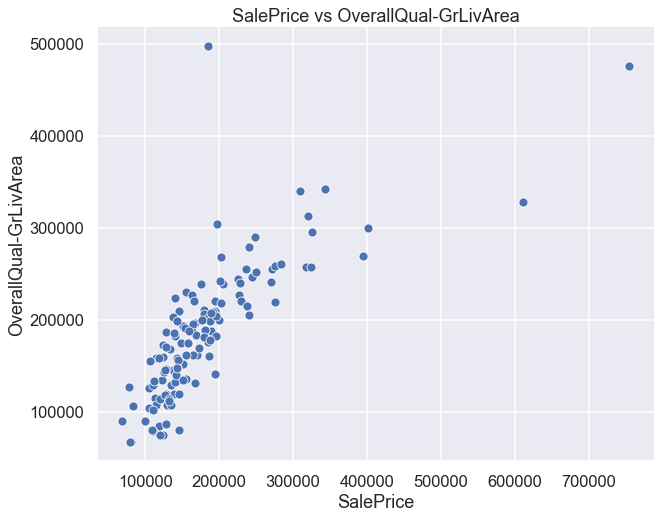

In [25]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x="SalePrice", y="OverallQual-GrLivArea", data=models_predictions);
plt.title("SalePrice vs OverallQual-GrLivArea");

Из графика мы видим как изменяется "OverallQual-GrLivArea" при истинном SalePrice 
Например: из параметров OverallQual и GrLivArea при стоимости 190000 наш модель спрогнозировал 150000 что на 21% меньше основной стоимости то есть 190000 - 150000 = 40000 (это только одного дома с параметрами) в среднем нам rmse посчитал 56461.25 что на 31.36% меньше средней стоимости домов. Из этого следует что данная модель не совсем подходит для прогнозирования цен.

In [26]:
models_predictions.describe()

,SalePrice,OverallQual-GrLivArea,OverallQual-GarageCars,OverallQual-GarageArea,OverallQual-1stFlrSF,GrLivArea-OverallQual,GrLivArea-GarageCars,GrLivArea-GarageArea,GrLivArea-1stFlrSF,GarageCars-OverallQual,...,GarageCars-GarageArea,GarageCars-1stFlrSF,GarageArea-OverallQual,GarageArea-GrLivArea,GarageArea-GarageCars,GarageArea-1stFlrSF,1stFlrSF-OverallQual,1stFlrSF-GrLivArea,1stFlrSF-GarageCars,1stFlrSF-GarageArea
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,180066.320896,185182.417910,183497.335821,181461.164179,183684.798507,185182.417910,187918.425373,185596.052239,188452.141791,183497.335821,...,184527.089552,186395.141791,181461.164179,185596.052239,184527.089552,183568.641791,183684.798507,188452.141791,186395.141791,183568.641791
std,88282.906428,71390.835224,65609.270454,64205.896242,66604.607531,71390.835224,66005.999290,63293.476934,67953.682828,65609.270454,...,49561.907323,58230.913798,64205.896242,63293.476934,49561.907323,54106.486287,66604.607531,67953.682828,58230.913798,54106.486287
min,68400.000000,67352.000000,75443.000000,70753.000000,73921.000000,67352.000000,82686.000000,81132.000000,94702.000000,75443.000000,...,106029.000000,90558.000000,70753.000000,81132.000000,106029.000000,87044.000000,73921.000000,94702.000000,90558.000000,87044.000000
25%,128475.000000,134234.000000,146360.000000,134370.750000,134201.500000,134234.000000,145084.000000,148599.000000,139725.000000,146360.000000,...,127432.500000,150441.000000,134370.750000,148599.000000,127432.500000,146034.000000,134201.500000,139725.000000,150441.000000,146034.000000
50%,158450.000000,183026.500000,183341.000000,174054.500000,173367.000000,183026.500000,177704.500000,175790.000000,179939.000000,183341.000000,...,190819.500000,178920.500000,174054.500000,175790.000000,190819.500000,176437.500000,173367.000000,179939.000000,178920.500000,176437.500000
75%,195750.000000,219985.500000,220323.000000,219400.750000,223596.000000,219985.500000,217908.500000,212134.250000,221479.500000,220323.000000,...,201496.500000,215246.750000,219400.750000,212134.250000,201496.500000,210683.750000,223596.000000,221479.500000,215246.750000,210683.750000
max,755000.000000,497269.000000,365203.000000,373907.000000,448153.000000,497269.000000,493989.000000,505182.000000,572293.000000,365203.000000,...,291287.000000,410727.000000,373907.000000,505182.000000,291287.000000,411606.000000,448153.000000,572293.000000,410727.000000,411606.000000


In [27]:
models_predictions.corr()

,SalePrice,OverallQual-GrLivArea,OverallQual-GarageCars,OverallQual-GarageArea,OverallQual-1stFlrSF,GrLivArea-OverallQual,GrLivArea-GarageCars,GrLivArea-GarageArea,GrLivArea-1stFlrSF,GarageCars-OverallQual,...,GarageCars-GarageArea,GarageCars-1stFlrSF,GarageArea-OverallQual,GarageArea-GrLivArea,GarageArea-GarageCars,GarageArea-1stFlrSF,1stFlrSF-OverallQual,1stFlrSF-GrLivArea,1stFlrSF-GarageCars,1stFlrSF-GarageArea
SalePrice,1.000000,0.769926,0.750584,0.756844,0.781079,0.769926,0.741146,0.731504,0.695884,0.750584,...,0.621247,0.716545,0.756844,0.731504,0.621247,0.681249,0.781079,0.695884,0.716545,0.681249
OverallQual-GrLivArea,0.769926,1.000000,0.905781,0.911382,0.935270,1.000000,0.907594,0.899784,0.858469,0.905781,...,0.629182,0.730257,0.911382,0.899784,0.629182,0.678701,0.935270,0.858469,0.730257,0.678701
OverallQual-GarageCars,0.750584,0.905781,1.000000,0.988854,0.928669,0.905781,0.817497,0.764511,0.640417,1.000000,...,0.814650,0.790551,0.988854,0.764511,0.814650,0.694251,0.928669,0.640417,0.790551,0.694251
OverallQual-GarageArea,0.756844,0.911382,0.988854,1.000000,0.944135,0.911382,0.805995,0.783275,0.660679,0.988854,...,0.798389,0.787513,1.000000,0.783275,0.798389,0.734234,0.944135,0.660679,0.787513,0.734234
OverallQual-1stFlrSF,0.781079,0.935270,0.928669,0.944135,1.000000,0.935270,0.809055,0.802336,0.797480,0.928669,...,0.671424,0.828262,0.944135,0.802336,0.671424,0.798817,1.000000,0.797480,0.828262,0.798817
GrLivArea-OverallQual,0.769926,1.000000,0.905781,0.911382,0.935270,1.000000,0.907594,0.899784,0.858469,0.905781,...,0.629182,0.730257,0.911382,0.899784,0.629182,0.678701,0.935270,0.858469,0.730257,0.678701
GrLivArea-GarageCars,0.741146,0.907594,0.817497,0.805995,0.809055,0.907594,1.000000,0.977571,0.897872,0.817497,...,0.772307,0.837446,0.805995,0.977571,0.772307,0.765095,0.809055,0.897872,0.837446,0.765095
GrLivArea-GarageArea,0.731504,0.899784,0.764511,0.783275,0.802336,0.899784,0.977571,1.000000,0.933630,0.764511,...,0.714025,0.809893,0.783275,1.000000,0.714025,0.799622,0.802336,0.933630,0.809893,0.799622
GrLivArea-1stFlrSF,0.695884,0.858469,0.640417,0.660679,0.797480,0.858469,0.897872,0.933630,1.000000,0.640417,...,0.505457,0.771530,0.660679,0.933630,0.505457,0.783754,0.797480,1.000000,0.771530,0.783754
GarageCars-OverallQual,0.750584,0.905781,1.000000,0.988854,0.928669,0.905781,0.817497,0.764511,0.640417,1.000000,...,0.814650,0.790551,0.988854,0.764511,0.814650,0.694251,0.928669,0.640417,0.790551,0.694251


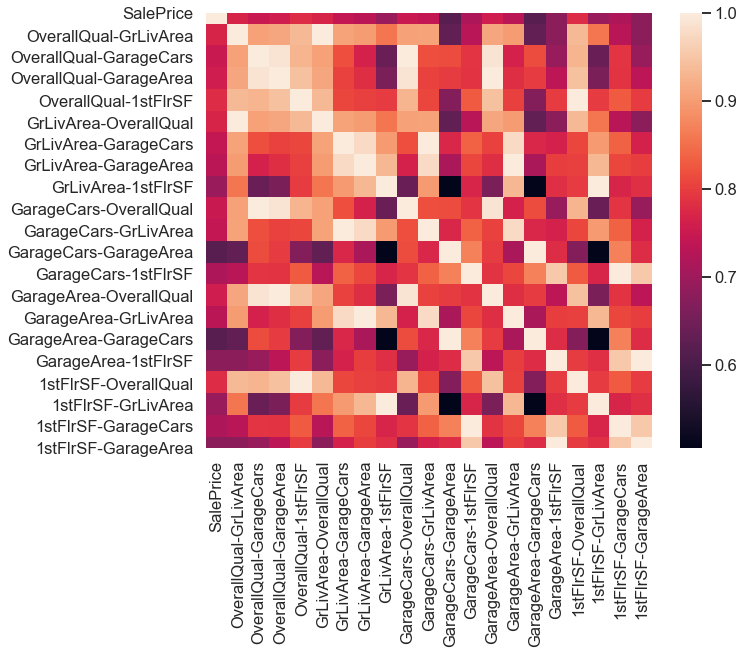

In [28]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(models_predictions.corr());

1. Видим не большую разницу средних значении все в районе от 180000 - 189000.
2. В стандартном отклонении наименьшее колебания у моделей чем SalePrice это означает что между элементами разница не большая 
3. Между минимальным значением разница моделей и SalePrice минимальна , а вот макисмальное значение у SalePrice = 755 000 а у моделей самым макс значением  572 293 примерно на 180 000 разница.
4. Если посмотреть на графику корреляции то он показывает прекрасный резлуьтат особенно нужно отметить верхний левый теплый  квадрат 

### Отличная работа